In [1]:
import json

In [2]:
file_data = open('sweat16_followers_id.json')

In [3]:
json_list = []
for line in file_data :
    json_list.append(json.loads(line))

In [4]:
# print(json_list[0])

In [5]:
from graph_tool.all import *

In [6]:
g = Graph()

In [7]:
# print(json_list[0].values())

In [8]:
# print(list(json_list[0].values()))

In [9]:
# print(list(json_list[0].values())[0])

In [10]:
vertex_dict = {}
member_list = []
for member in json_list :
    v_member = g.add_vertex()
    member_list.append(v_member)
    follower_list = list(member.values())[0]
    for follower in follower_list :
        if not follower in vertex_dict.keys() :
            vertex_dict[follower] = g.add_vertex()
        g.add_edge(vertex_dict[follower],v_member)

In [11]:
color_dict = {}
color_dict[member_list[0]] = "tomato"
color_dict[member_list[1]] = "palegoldenrod"
color_dict[member_list[2]] = "yellow"
color_dict[member_list[3]] = "greenyellow"
color_dict[member_list[4]] = "darkseagreen"
color_dict[member_list[5]] = "turquoise"
color_dict[member_list[6]] = "teal"
color_dict[member_list[7]] = "steelblue"
color_dict[member_list[8]] = "lightslategrey"
color_dict[member_list[9]] = "mediumslateblue"
color_dict[member_list[10]] = "orchid"
color_dict[member_list[11]] = "lightpink"
color_dict[member_list[12]] = "darkgrey"
vprop_int = g.new_vertex_property("int")
vprop_color = g.new_vertex_property("string")
eprop_color = g.new_edge_property("string")

for v in g.vertices() :
    if v.in_degree() > 0 :
        vprop_int[v] = 20
        vprop_color[v] = color_dict[v]
    else :
        vprop_int[v] = 5
        if v.out_degree() > 1 :
            vprop_color[v] = "white"
        else :
            for w in v.out_neighbors() :
                vprop_color[v] = color_dict[w]
for e in g.edges() :
    eprop_color[e] = color_dict[e.target()]

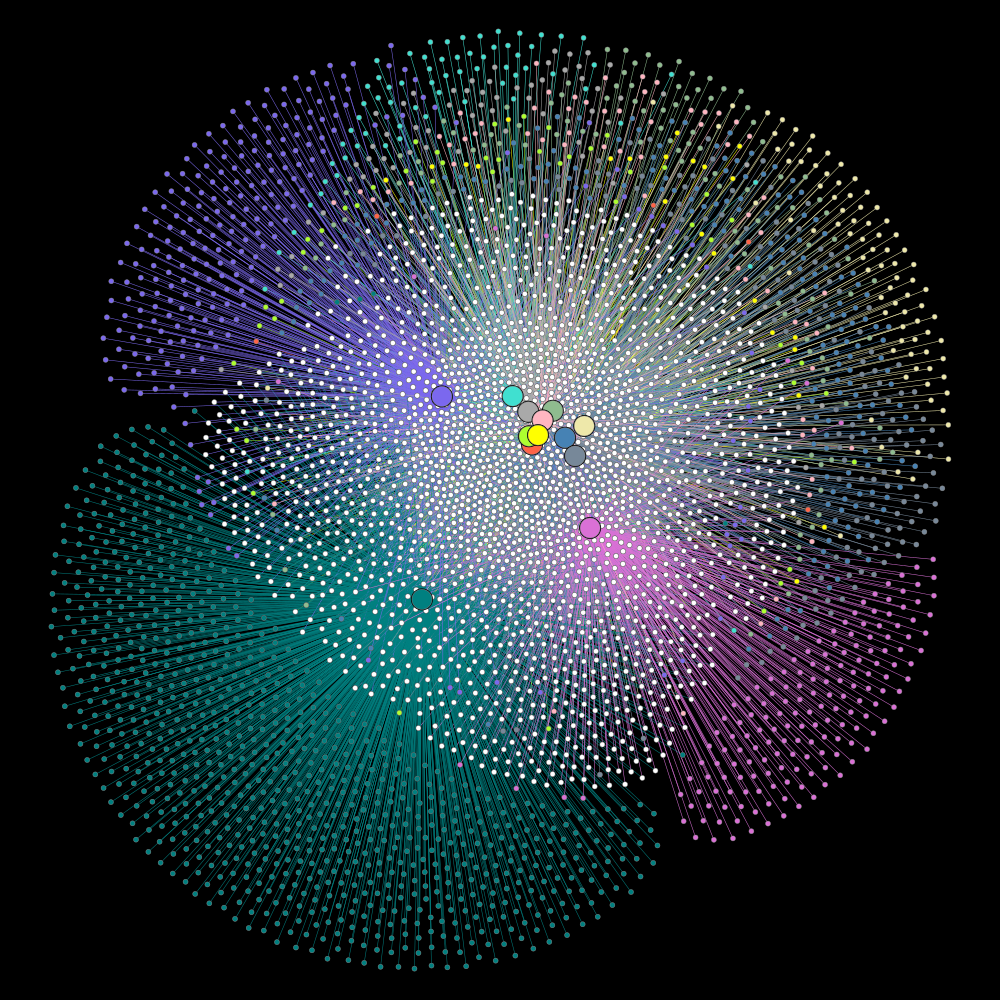

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe398668a58, at 0x7fe35a44bef0>

In [13]:
graph_draw(g, bg_color=[0,0,0,1], edge_color=eprop_color, vorder=vprop_int, vertex_halo=True, vertex_halo_color='black', vertex_halo_size=1.1,
           vertex_size=vprop_int, vertex_fill_color=vprop_color, output_size=(1000, 1000), output="graph.png")

In [27]:
g_label = Graph()
vprop_label_color = g_label.new_vertex_property("string")
vprop_label_string = g_label.new_vertex_property("string")
vprop_label_pos = g_label.new_vertex_property("vector<double>")
for member in json_list :
    label = g_label.add_vertex()
    vprop_label_color[label] = color_dict[member_list[json_list.index(member)]]
    vprop_label_string[label] = list(member.keys())[0]
    vprop_label_pos[label] = (-100,25*json_list.index(member))

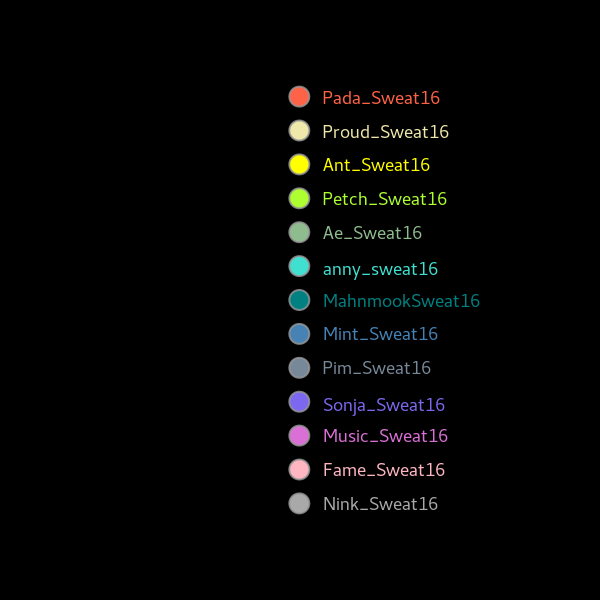

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe35a4245f8, at 0x7fe35a414fd0>

In [28]:
graph_draw(g_label, pos=vprop_label_pos, bg_color=[0,0,0,1], vertex_text=vprop_label_string, vertex_text_color=vprop_label_color,
           vertex_text_position=0, vertex_font_size=18, vertex_halo=True, vertex_halo_color='black', vertex_halo_size=1.1, vertex_size=20, 
           vertex_fill_color=vprop_label_color, output="label.png")

In [29]:
for l in vprop_label_pos:
    print(l)

array([-100.,    0.])
array([-100.,   25.])
array([-100.,   50.])
array([-100.,   75.])
array([-100.,  100.])
array([-100.,  125.])
array([-100.,  150.])
array([-100.,  175.])
array([-100.,  200.])
array([-100.,  225.])
array([-100.,  250.])
array([-100.,  275.])
array([-100.,  300.])
